# Import libraries

In [26]:
!pip install extcolors
!pip install colorgram.py 
!pip install opencv-python
!pip install colormap 
!pip install easydev
!pip install pandas
!pip install matplotlib


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import extcolors

from colormap import rgb2hex

# Create a function
Next, I will explain a step-by-step how to create a function for color extraction. If you want to get the function directly, please score down to Define a function.
### Resizing the image
Start with preparing the input image. Pictures that are taken with modern cameras and mobile phones are too large. Some can take a picture with more than 50 megapixels (a 4K monitor can only display approximately 8.3 megapixels). If we directly use a huge image, processing may take some time.

Thus, the first thing to do is resize. The code below shows how to resize a picture to 900 pixels in width. If the image is not huge or your CPU is fast, this step can be omitted, or the output resolution number can be increased. Please take into account that after resizing the photo, the new one will be saved on your computer for reading in the next step.

In [2]:
input_name = 'img/R.jfif'
output_width = 900                   #set the output size
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)

#save
resize_name = 'resize_' + input_name  #the resized image name
img.save(resize_name)                 #output location can be specified before resize_name

#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

C:\Users\kooky\AppData\Local\Temp\ipykernel_14712\109650845.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


FileNotFoundError: [Errno 2] No such file or directory: 'resize_img/R.jfif'

# Color extraction
Extract color with the extcolors library. The parameters that we have to set up:

- tolerance: group colors to limit the output and give a better visual representation. Based on a scale from 0 to 100. Where 0 won’t group any color and 100 will group all colors into one.
- limit: upper limit to the number of extracted colors presented in the output.
In the code below, I set the tolerance value equal to 12 and limit the number of color codes output to 11 colors (limit=12). The number can be changed as you desire. The obtained result will be in RGB color codes and their occurrence.



In [ ]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
print(colors_x)

([((8, 3, 7), 116111), ((227, 227, 227), 80567), ((54, 52, 57), 72801), ((113, 114, 116), 71624), ((155, 157, 156), 60051), ((32, 33, 27), 14295), ((80, 80, 82), 13700), ((193, 194, 189), 11968), ((44, 64, 29), 8144), ((99, 83, 68), 7679), ((36, 17, 11), 3504), ((136, 134, 119), 3464)], 505800)


Define a function to convert the RGB codes into HEX color codes with the rgb2hex library and create a DataFrame.

In [ ]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
print(df_color)

     c_code occurence
0   #080307    116111
1   #E3E3E3     80567
2   #363439     72801
3   #717274     71624
4   #9B9D9C     60051
5   #20211B     14295
6   #505052     13700
7   #C1C2BD     11968
8   #2C401D      8144
9   #635344      7679
10  #24110B      3504


# Donut chart

Plot a donut chart to visualize the result.

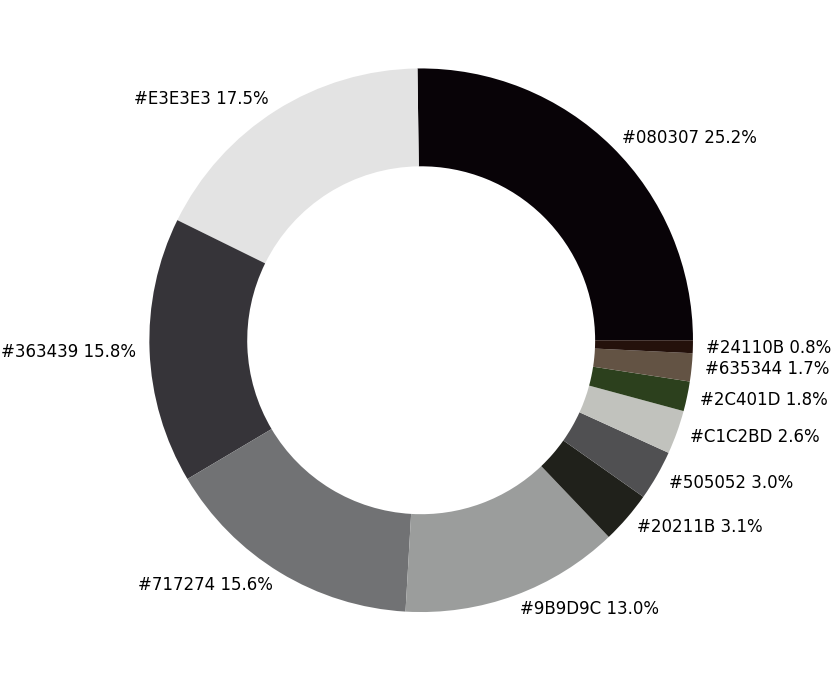

In [ ]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

# Color palette

Create a color palette and label them with the HEX color codes. If the limit number in the extracting step is set up with more than 12 colors, the X-axis and Y-axis values can be modified to accommodate the result.


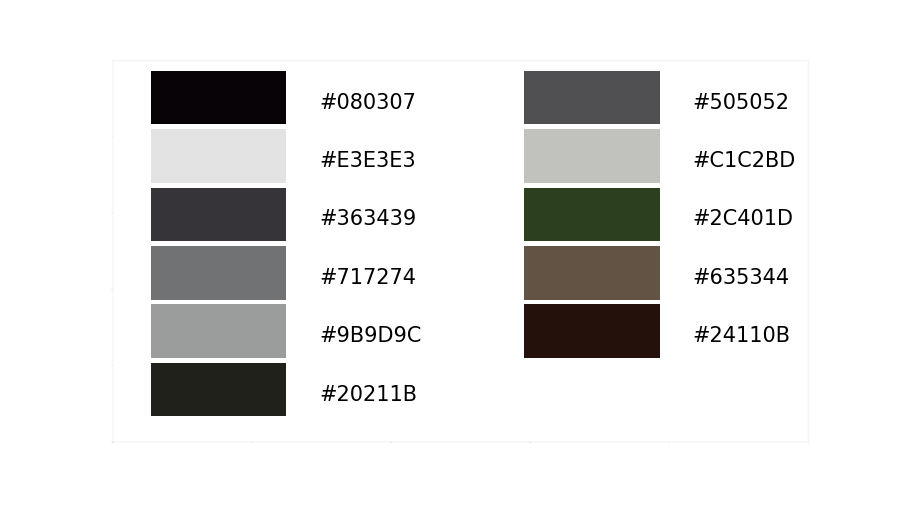

In [ ]:
#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('img/bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('img/bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()

Finally, let’s combine the codes.

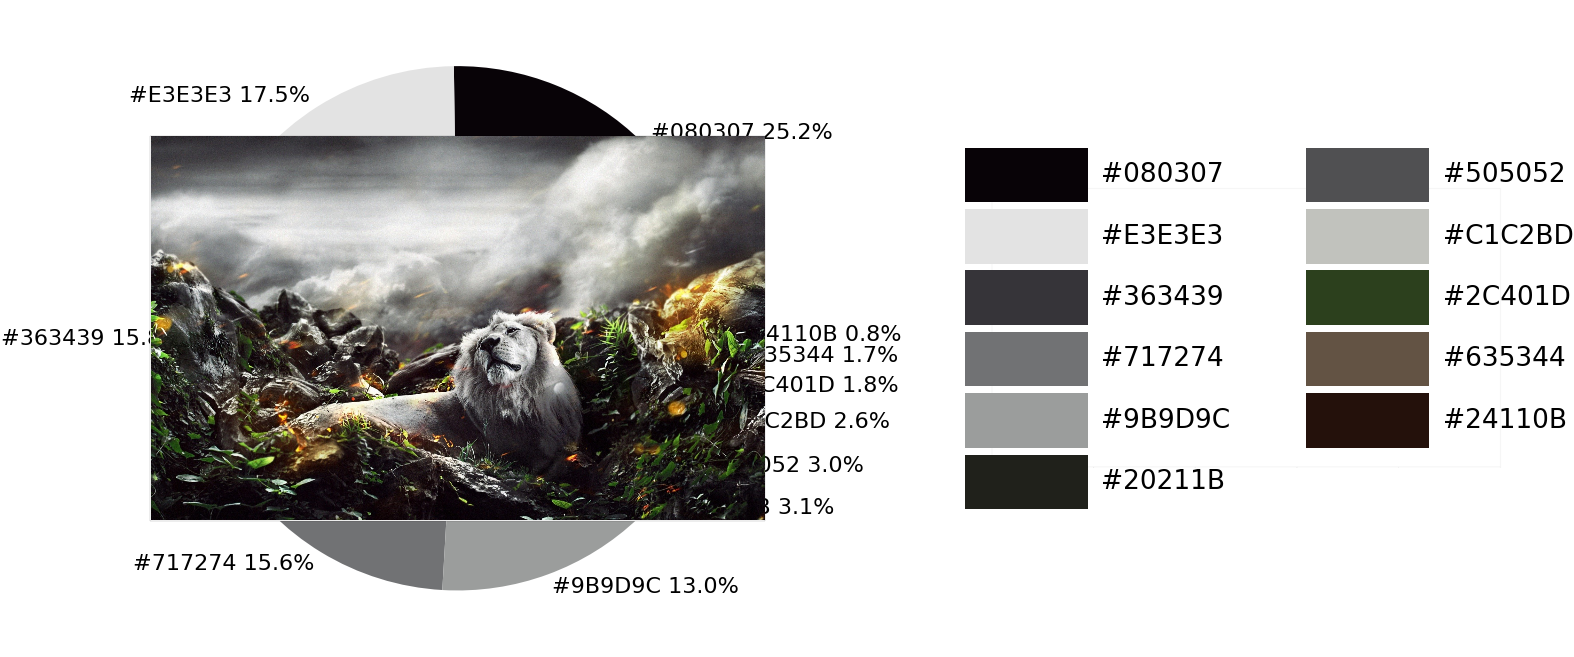

In [ ]:
img = mpimg.imread('img/R.jfif')
bg = plt.imread('img/bg.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)

#donut plot
wedges, text = ax1.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 160, 'color':'black'})
plt.setp(wedges, width=0.3)

#add image in the center of donut plot
imagebox = OffsetImage(img, zoom=2.3)
ab = AnnotationBbox(imagebox, (0, 0))
ax1.add_artist(ab)

#color palette
x_posi, y_posi, y_posi2 = 160, -170, -170
for c in list_color:
    if list_color.index(c) <= 5:
        y_posi += 180
        rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
        ax2.add_patch(rect)
        ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
    else:
        y_posi2 += 180
        rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
        ax2.add_artist(rect)
        ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

ax2.axis('off')
fig.set_facecolor('white')
plt.imshow(bg)       
plt.tight_layout()

# Define a function

With all the steps we have done so far, let’s combine them to apply to other images easily. The function is for applying to images located in the same folder as the python file.

In [ ]:
def exact_color(input_image, resize, tolerance, zoom):
    #background
    bg = 'img/bg.png'
    fig, ax = plt.subplots(figsize=(192,108),dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)
    
    #resize
    output_width = resize
    img = Image.open(input_image)
    if img.size[0] >= resize:
        wpercent = (output_width/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        img = img.resize((output_width,hsize), Image.ANTIALIAS)
        resize_name = 'resize_'+ input_image
        img.save(resize_name)
    else:
        resize_name = input_image
    
    #crate dataframe
    img_url = resize_name
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 13)
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_precent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 150, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(resize_name)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    return plt.show()

# Apply function
Explaining the parameters that we have to set up for the exact_color function:
```
exact_color('image name', resized_width, tolerance, zoom)
```
- image location/name: the image location and its name on your computer.
- resized_width: the photo width output that we want to resize.
- tolerance: group colors to limit the output based on a scale from 0 to 100.
- zoom: resize the photo in the center of the donut chart.

Start with setting the tolerance value equal to 12

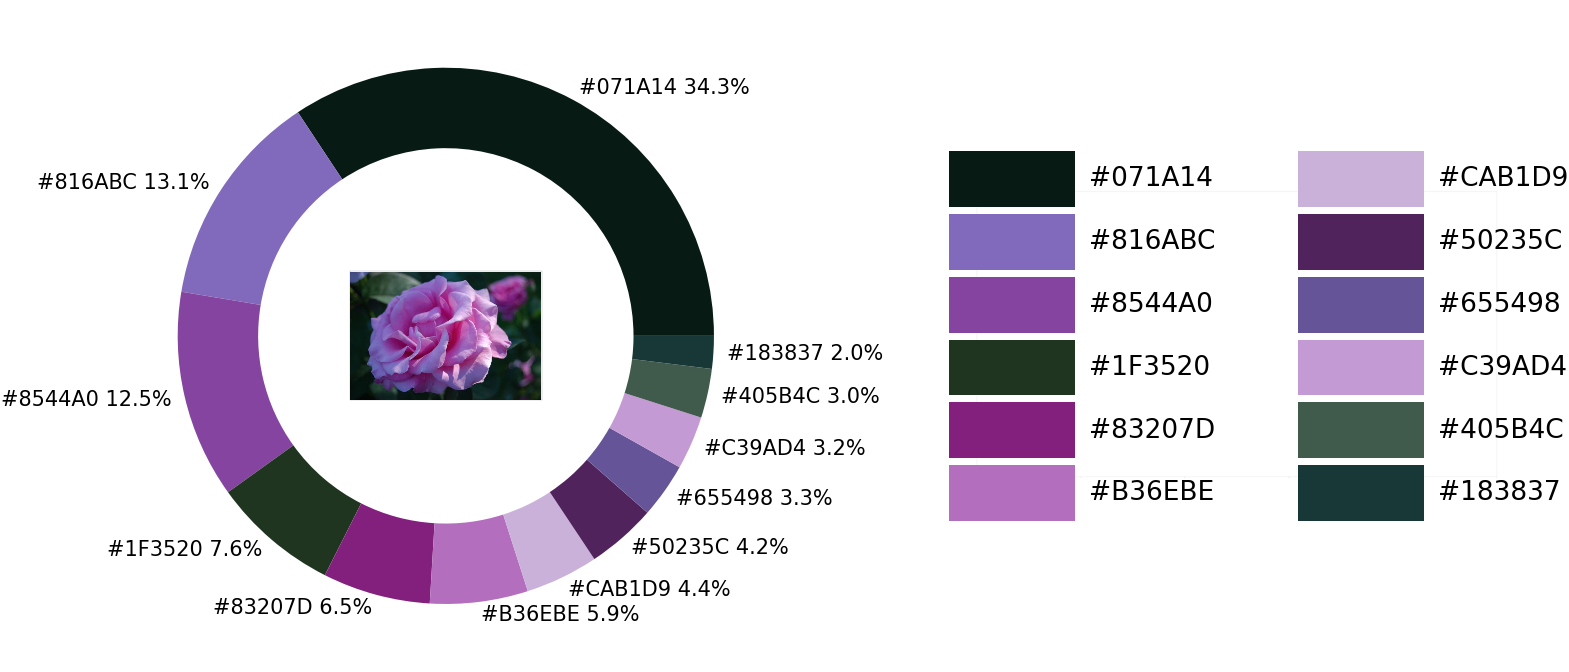

In [ ]:
exact_color('img/rose.jpg', 900, 12, 2.5)

It can be noticed that there is no pink color in the result above. This might happen because the colors that are grouped are too small. Thus, we will increase the number of tolerance to 24.

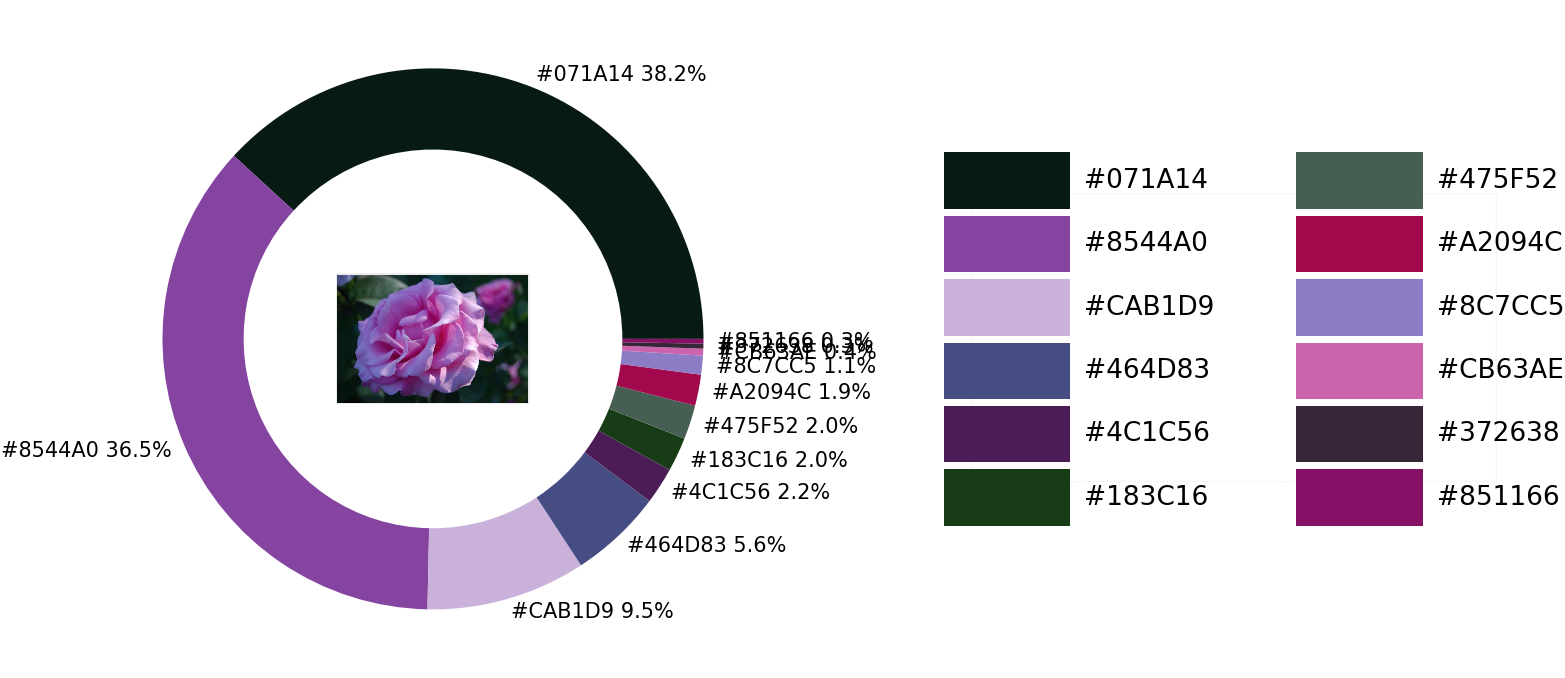

In [ ]:
exact_color('img/rose.jpg', 900, 24, 2.5)

The result has been improved. There is a pink color code in the palette. We can go further by creasing the tolerance number to 36 to get more pink color codes. The following result returns 2 shades of pink color.

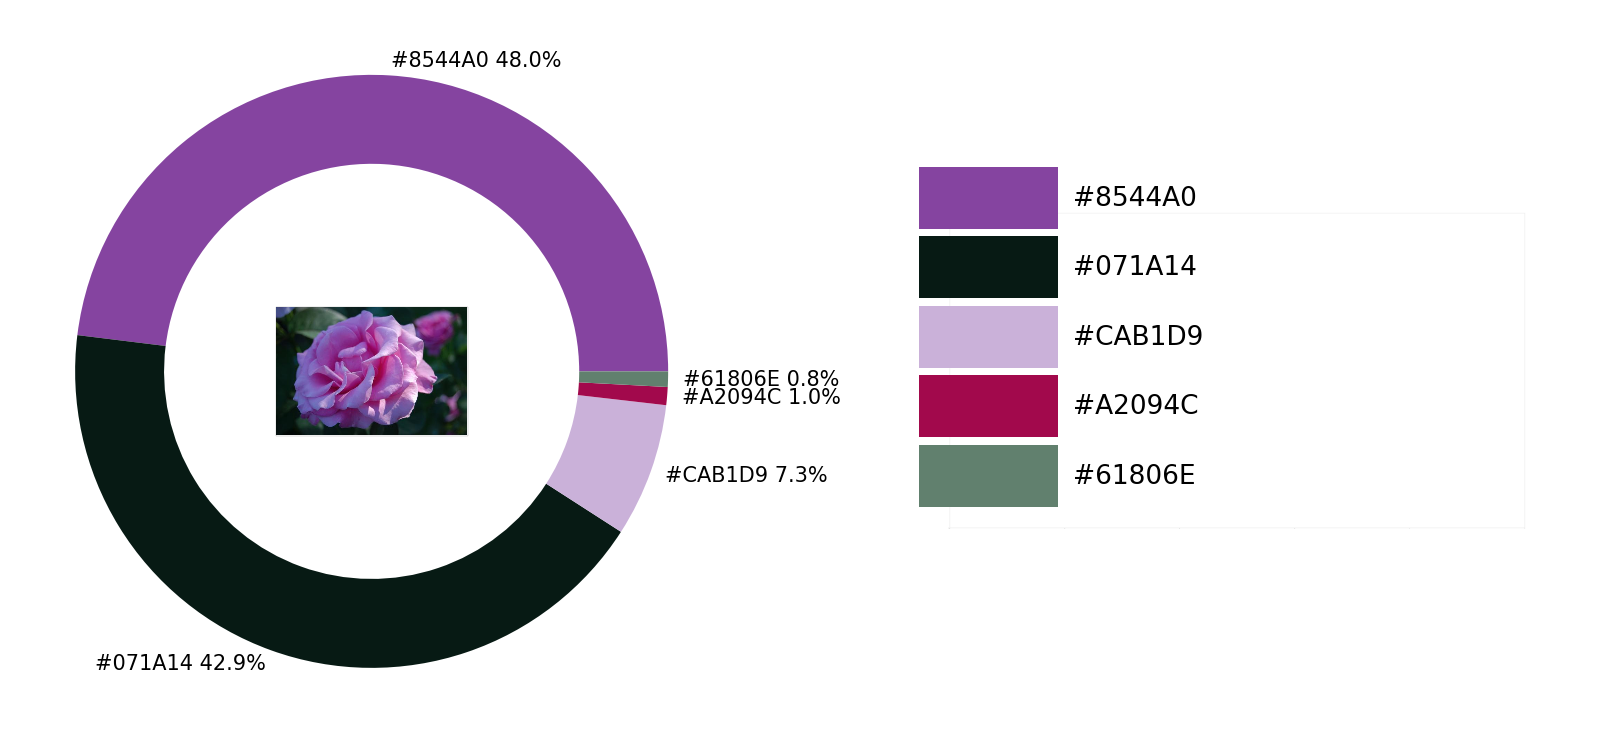

In [ ]:
exact_color('img/rose.jpg', 900, 36, 2.5)

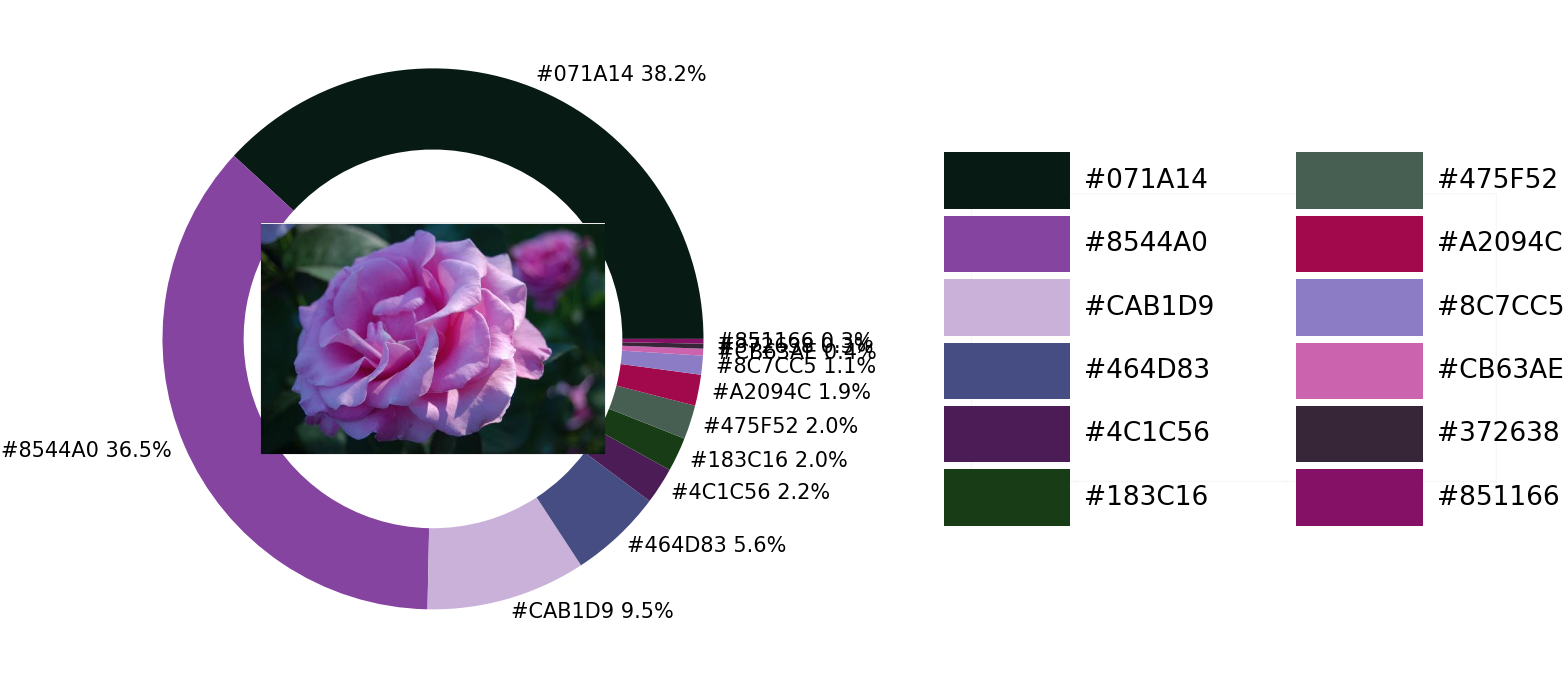

In [ ]:
exact_color('img/rose.jpg', 900, 24, 4.5)

! Another way to improve the result is cropping the photo by using some computer programs before analyzing. I cropped the input image before running with the code